# **General data preparation tutorial**


### Welcome on this data preparation tutorial. This notebook is aimed for beginners who wants to learn how to correctly prepare a dataset in order to pass it to a machine learning algorithm. I encourage you to fork this notebook, try the code and improve it !¶

![](https://2s7gjr373w3x22jf92z99mgm5w-wpengine.netdna-ssl.com/wp-content/uploads/2016/07/shutterstock_data_prep_-faithie.jpg)

### Here is some additional resources you can consult to go further in understanding the different techniques that we are going to see in this notebook :

[*Deal with missing values*](https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca)  
[*Features engineering*](https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/)  
[*Why hot-one Encode in machine learning ?*](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)  
[*Dummy variable trap*](https://www.algosome.com/articles/dummy-variable-trap-regression.html)  
[*Hot-one Encoding*](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding)  
[*Scaling & Normalization*](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e)  

## **Table of contents**

1. [**Dealing with missing values**](#missing)
2. [**Features engineering**](#fe)
3. [**Handling categorical features**](#catvar)
4. [**Feature scaling**](#scaler)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import StandardScaler

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [2]:
# Path of datasets
titanic_df = pd.read_csv('../input/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **1. Dealing with missing values & outliers** <a id="missing"></a>

### The first problem we encounter when preparing the data to pass it to a ML algorithm is the missing data. Indeed, most of dataset, especially dataset made of real world data, have missing values. For example, we can see here that our titanic dataset have some missing values :

In [3]:
missing_values = draw_missing_data_table(titanic_df)
display(missing_values)
missing_values[['Percent']].iplot(kind='bar', xTitle='Features', yTitle='Percent of missing values', title='Percent missing data by feature')

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


### If a feature (a column of our dataset) do not have too much of it values missing, we can try to fill in these missing values. There are a lot of methods for filling in these values :

- If there are too much missing data (>60%), you can drop the column :

      titanic_df.drop('Cabin', axis=1, inplace=True)
      
- If there are only few missing data (1-2%) you can drop the rows which contain NAN :

      titanic_df['Age'].dropna(inplace=True)

### An better solution for a small amount of missing data is to study each obsevation case by case and replace missing values by looking at other features for this observation and try to find pattern between them to find out what can be the missing value.

- In general, we don't want to loose data. A solution is to replace missing values by the mean or the median of the column. You should prefer median for columns which contains outliers that can skew the mean. 

      titanic_df['Age'].fillna(titanic_df['Age'].mean(), 1, inplace=True)
      titanic_df['Age'].fillna(titanic_df['Age'].median(), 1, inplace=True)

### The strategy of filling missing values depends a lot of the dataset and of your imagination ! So try to be creative, ask why these data are missing and how can I intelligently replace it ! Don't forget to try different replacing methods and to measure how the methods affect the performance of your model. Let's proceed with our titanic dataset :

### There is only two missing values for the embarked column, let's try to replace it. Below is the distribution of Embarked according to Fare and sex, and the two observations with missing "Embarked" value. Let's look at there two observations and choose the best matching embarked value according to their fare value and sex:

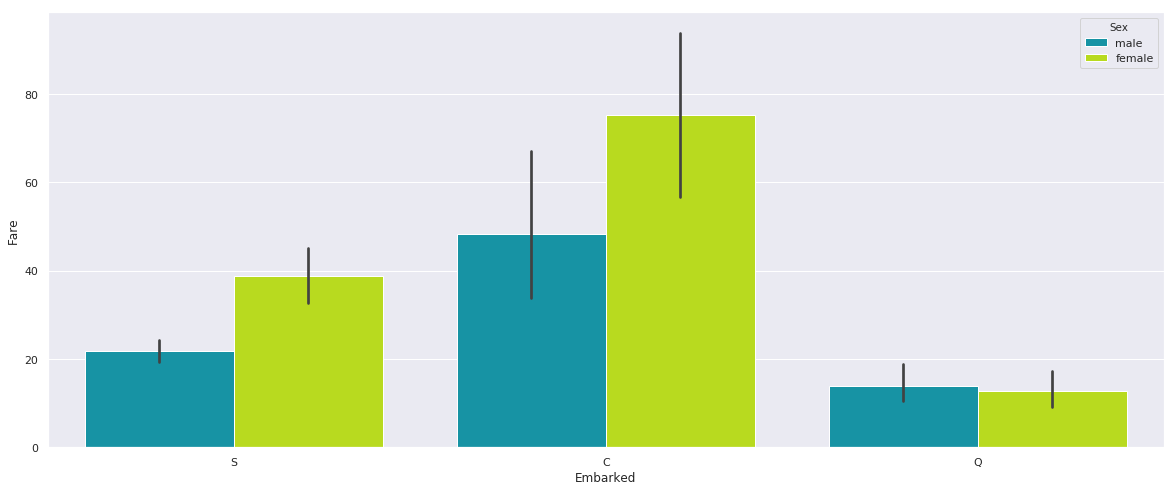

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [4]:
figure, axes = plt.subplots(1,1,figsize=(20, 8))
plot = sns.catplot(x="Embarked", y="Fare", hue="Sex", data=titanic_df, palette=('nipy_spectral'), kind="bar", ax=axes)
plt.close(plot.fig)
plt.show()
display(titanic_df[titanic_df['Embarked'].isnull()])

### Both passengers are female who paid 80 dollars as fare for their tickets. Moreover, they have the same ticket and cabin, so they probably had to board at the same place! According to the distribution above, the more probable embarked value for them is Cherbourg (C).. Let's replace these missing values:

In [5]:
titanic_df['Embarked'].fillna('C', inplace=True)

### For the age, we have 177 missing values, it's way too much to look a them case by case. We'll replace it by the median, altrough it may exist better solution which take into account other columns. If you find a solution for replacing missing age values which improve a lot the accuracy of your model, please share it in comments !

In [6]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

### Finally, cabin column is useful for finding the deck in which the passenger cabin is located, so we'll keep it. Let's replace missing values by 'U', meaning 'Unkown':

In [7]:
titanic_df['Cabin'].fillna('U', inplace=True)

In [8]:
draw_missing_data_table(titanic_df[['Cabin', 'Age', 'Embarked']])

,Total,Percent
Embarked,0,0.0
Age,0,0.0
Cabin,0,0.0


## **2. Features engineering** <a id="fe"></a>

### Feature engineering is the art of creating new features from already existing features or from knowledge about data. For example, with a small search on internet, we can identify that the first letter in the values of the cabin column corresponds to the deck of the boat in which the cabin is located. Thus, we can create a 'Deck' feature from the cabin feature. We can also create a Title column which corresponds to the title contained in the name of each passenger. Your imagination is the only limit to creation of features ! But keep in mind that you don't want to create features just to create features, the goal is to improve the accuracy of the model ! Here is few examples of features creation for the titanic dataset:

In [9]:
# Deck column from letter contained in cabin
titanic_df['Deck'] = titanic_df['Cabin'].str[:1]
titanic_df['Deck'] = titanic_df['Cabin'].map({cabin: p for p, cabin in enumerate(set(cab for cab in titanic_df['Cabin']))})

# Title column from title contained in name
titanic_df['Title'] = pd.Series((name.split('.')[0].split(',')[1].strip() for name in titanic_df['Name']), index=titanic_df.index)
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_df['Title'] = titanic_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Famillysize columns obtained by adding number of sibling and parch
titanic_df['FamillySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['FamillySize'][titanic_df['FamillySize'].between(1, 5, inclusive=False)] = 2
titanic_df['FamillySize'][titanic_df['FamillySize']>5] = 3
titanic_df['FamillySize'] = titanic_df['FamillySize'].map({1: 'Alone', 2: 'Medium', 3: 'Large'})

# IsAlone and IsChild column, quite explicit
titanic_df['IsAlone'] = np.where(titanic_df['FamillySize']!=1, 0, 1)
titanic_df['IsChild'] = titanic_df['Age'] < 18
titanic_df['IsChild'] = titanic_df['IsChild'].astype(int)    

### Once we've finished to create our new features, we can delete all useless remaining columns and print the first rows of our dataset:

In [10]:
titanic_df = titanic_df.drop(['Name', 'Ticket', 'PassengerId', 'Cabin'], 1)    
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,FamillySize,IsAlone,IsChild
0,0,3,male,22.0,1,0,7.2500,S,94,Mr,Medium,0,0
1,1,1,female,38.0,1,0,71.2833,C,84,Mrs,Medium,0,0
2,1,3,female,26.0,0,0,7.9250,S,94,Miss,Alone,0,0
3,1,1,female,35.0,1,0,53.1000,S,36,Mrs,Medium,0,0
4,0,3,male,35.0,0,0,8.0500,S,94,Mr,Alone,0,0


## **3. Handling categorical features** <a id="catvar"></a>

### As you can notice when looking at the dataset above, we've some categorical features in our data. Categorical features are features which values are non-numeric. Here, we have 4 of them : Sex, Embarked, Title, FamillySize. We need to transform it into numeric features in order to pass it to a machine learning algorithm.
### A solution is to transform these features into numeric features can be to map the string values with numeric values. This solution is called label encoding. It can be done easily in Python using LabelEncoder class from scikit learn or map method of a pandas dataframe. For example, to label encode the Embarked column of the titanic dataset we have to transform letters corresponding to the embarked location into a number :

 - Embarked Cherbourg corresponds to 1
 - Embarked Southampton corresponds to 2
 - Embarked Queenstown corresponds to 3

### The problem of doing this is that the algorithm may see this as a ranking between the three values. A better solution is to use hot-one encoding. Hot-one encoding means create one column per value of the source column (it is called a dummy variable), which take only binary values. For example, the embacked column dummy encoded gives us three columns : Embarked_C, Embarked_S, Embarked_Q. A passenger who embarked at southampton will for example have his Embarked_S column set to 1, whereas the two other embarked columns will be set to 0.

![](https://www.renom.jp/notebooks/tutorial/preprocessing/category_encoding/renom_cat_onehot.png)

### However, by doing this, we create a redundant column : with two of the three Embarked colomns, we can guess easily the value of the third column. For example, a passenger with Embarked_C and Embarked_S set to 0 will have necessarily his Embarked_Q column set to 1. In order to avoid that redundance, called the dummy variable trap, we must drop one of the column made when creating a dummy variable. 

*Note: One-hot encoding usually helps, but it can varies on a case-by-case basis. Do not hesitate to test the effect of HO encoding on your model to see if you need it.*

### There is a verry simple way to do hot-one encoding in python, the pandas get_dummies function creates hot-one encoding for all categorical features of a dataset. By adding the argument drop_first=True, we drop one column for each dummy variable to dummy encode: 

In [11]:
titanic_df = pd.get_dummies(data=titanic_df, drop_first=True)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,IsAlone,IsChild,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamillySize_Large,FamillySize_Medium
0,0,3,22.0,1,0,7.2500,94,0,0,1,0,1,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,84,0,0,0,0,0,0,0,1,0,0,1
2,1,3,26.0,0,0,7.9250,94,0,0,0,0,1,1,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,36,0,0,0,0,1,0,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,94,0,0,1,0,1,0,1,0,0,0,0


## **4. Feature scaling** <a id="scaler"></a>

### Finally, we need to perform normalization on the data. Normalizing the data is necessary because feeding a machine learning model with large or heterogeneous values can trigger large gradient updates that will prevent the gradient descent algorithm from converging. Let's look at the ranges of values for our dataframe:

In [12]:
ranges = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Deck', 'IsChild']].max().to_frame().T
ranges.iplot(kind='bar', xTitle='Features', yTitle='Range', title='Range of feature before scaling')

### Ranges are very heterogeneous. One way to change this is by using features scaling. Features scaling will set each column mean to 0 and each column variance to 1. In python, the StandarScaler class of the scikit-learn module allows us to do it vey easily:

In [13]:
X = titanic_df.drop(['Survived'], 1)
y = titanic_df['Survived']

# Feature scaling of our data
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Deck,IsAlone,IsChild,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamillySize_Large,FamillySize_Medium
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.197716,0.0,-0.381109,0.737695,-0.307562,0.619306,-0.511898,0.850532,-0.405840,-0.162781,-0.235981,1.432260
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,-0.263449,0.0,-0.381109,-1.355574,-0.307562,-1.614710,-0.511898,-1.175735,2.464027,-0.162781,-0.235981,1.432260
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.197716,0.0,-0.381109,-1.355574,-0.307562,0.619306,1.953514,-1.175735,-0.405840,-0.162781,-0.235981,-0.698197
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,-2.477042,0.0,-0.381109,-1.355574,-0.307562,0.619306,-0.511898,-1.175735,2.464027,-0.162781,-0.235981,1.432260
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.197716,0.0,-0.381109,0.737695,-0.307562,0.619306,-0.511898,0.850532,-0.405840,-0.162781,-0.235981,-0.698197


### And ... we are done ! Our dataset is finally ready to go into a machine learning algorithm ! Don't forget to check my two others kernel for this dataset:

- [**Complete Titanic tutorial with ML, NN & Ensembling**](https://www.kaggle.com/nhlr21/complete-titanic-tutorial-with-ml-nn-ensembling)
- [**Titanic colorful EDA**](https://www.kaggle.com/nhlr21/titanic-colorful-eda)